In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
stats = [
    'Goals',
    'Assists',
    'Yel',
    'Red',
    'SpG',
    'PS%',
    'AerialsWon',
    'MoM',
    'Rating',
    'Tackles',
    'Inter',
    'Offsides',
    'Clear',
    'Dribbles allowed',
    'Blocks',
    'OwnGoal',
    'Key_pass_per_game',
    'Dribble',
    'Foul_given_game',
    'Offside_given_per_game',
    'Dispossessed_per_game',
    'Unsuccessful touches',
    'Average_per_pass',
    'Crosses_per_game',
    'Longpass_per_game',
    'Through_ball_per_game',
    'xG',
    'xGDiff',
    'xGPerNinety',
    'totalShots',
    'xGPerShot',
    'TotalTackles',
    'DribbledPast',
    'TotalAttemptedTackles',
    'Total_Interception',
    'Fouled',
    'Fouls',
    'CaughtOffside',
    'Total_Clearances',
    'ShotsBlocked',
    'CrossesBlocked',
    'PassesBlocked',
    'Total_Saves',
    'SixYardBox_Saves',
    'PenaltyArea_Saves',
    'OutOfBox_Saves',
    'Total_Shots',
    'OutOfBox_Shots',
    'SixYardBox_Shots',
    'PenaltyArea_Shots',
    'Total_Goals',
    'SixYardBox_Goals',
    'PenaltyArea_Goals',
    'OutOfBox_Goals',
    'Unsuccessful_Dribbles',
    'Successful_Dribbles',
    'Total Dribbles',
    'UnsuccessfulTouches',
    'Dispossessed',
    'Total_Aerial',
    'Won',
    'Lost',
    'Total_Passes',
    'AccLB',
    'InAccLB',
    'AccSP',
    'InAccSP',
    'Total_Key passes',
    'Long',
    'Shortpass_per_game',
    'Cross',
    'Corner',
    'Throughball',
    'Freekick',
    'Throwin',
    'Other',
    'Total_Assists'
]

In [3]:
def convert_market_value(value):
    if pd.isna(value):
        return None
    value = value.replace('€', '').strip().lower()
    if 'm' in value:
        return float(value.replace('m', '')) * 1_000_000
    elif 'k' in value:
        return float(value.replace('k', '')) * 1_000
    try:
        return float(value)
    except ValueError:
        return None

In [4]:
df = pd.read_csv('/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/all_players_stats_total.csv')
df.head(10)

,player_name,team_name,age,position,Apps,Mins,Goals,Assists,Yel,Red,...,Long,Shortpass_per_game,Cross,Corner,Throughball,Freekick,Throwin,Other,Total_Assists,Market Value
0,Asmir Begovic,Everton,36,Goalkeeper,1,90,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0
1,Kevin De Bruyne,Manchester City,32,Attacking Midfield,28(4),2425,7,16,1,0,...,0.8,2.2,0.2,0.0,0.1,0.0,0.0,0.2,0.5,70000000.0
2,Stefan Ortega,Manchester City,31,Goalkeeper,3,270,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000000.0
3,Erling Haaland,Manchester City,23,Centre-Forward,33(2),2779,36,8,5,0,...,0.0,0.9,0.0,0.0,0.1,0.0,0.0,0.2,0.2,180000000.0
4,Harry Kane,Tottenham,30,Centre-Forward,38,3408,30,3,6,0,...,0.3,1.2,0.0,0.0,0.0,0.0,0.0,0.1,0.1,90000000.0
5,Bruno Fernandes,Manchester United,29,Attacking Midfield,37,3320,8,8,6,0,...,0.6,2.6,0.0,0.0,0.1,0.0,0.0,0.1,0.2,75000000.0
6,Gabriel Jesus,Arsenal,27,Centre-Forward,24(2),2075,11,6,6,0,...,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.2,0.2,75000000.0
7,Kieran Trippier,Newcastle,33,Right-Back,38,3348,1,7,5,0,...,1.7,1.2,0.1,0.0,0.0,0.1,0.0,0.0,0.2,11000000.0
8,Bukayo Saka,Arsenal,22,Right Winger,37(1),3195,14,11,6,0,...,0.5,1.5,0.1,0.1,0.0,0.0,0.0,0.2,0.3,120000000.0
9,Solly March,Brighton,29,Right Winger,31(2),2728,7,7,2,0,...,0.4,1.6,0.1,0.0,0.0,0.0,0.0,0.1,0.2,22000000.0


In [5]:
df['position'].unique()

array(['Goalkeeper', 'Attacking Midfield', 'Centre-Forward', 'Right-Back',
       'Right Winger', 'Left Winger', 'Defensive Midfield',
       'Central Midfield', 'Centre-Back', 'Left-Back', 'Left Midfield',
       'Second Striker', 'Right Midfield'], dtype=object)

In [6]:
df = df.drop(['Apps', 'Mins', 'team_name'], axis=1)

In [7]:
# def analyze_correlation(position_data):  
#     # corr_data = position_data[stats + ['Market Value']].corr()
#     # plt.figure(figsize=(20, 14))
#     # sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#     # plt.title(f"{position_data['position'].iloc[0]} Position Corelation Heatmap")
#     # plt.show()

#     corr_data = position_data[stats].corrwith(position_data['Market Value']).sort_values(ascending=False)
#     plt.figure(figsize=(12, 20))
#     sns.heatmap(corr_data.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#     plt.title(f"{position_data['position'].iloc[0]} Position Correlation with Market Value")
#     plt.xlabel('Correlation')
#     plt.ylabel('Stats')
#     plt.show()

# data = df[df['position'] == 'Central Midfield']
# analyze_correlation(data)

In [8]:
# data_cleaned = data[stats].fillna(data[stats].mean())

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data_cleaned)

# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(scaled_data)

# corr_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=stats)

# plt.figure(figsize=(12, 20))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Correlation between Principal Components and Original Variables")
# plt.xlabel("Principal Components")
# plt.ylabel("Original Variables")
# plt.show()

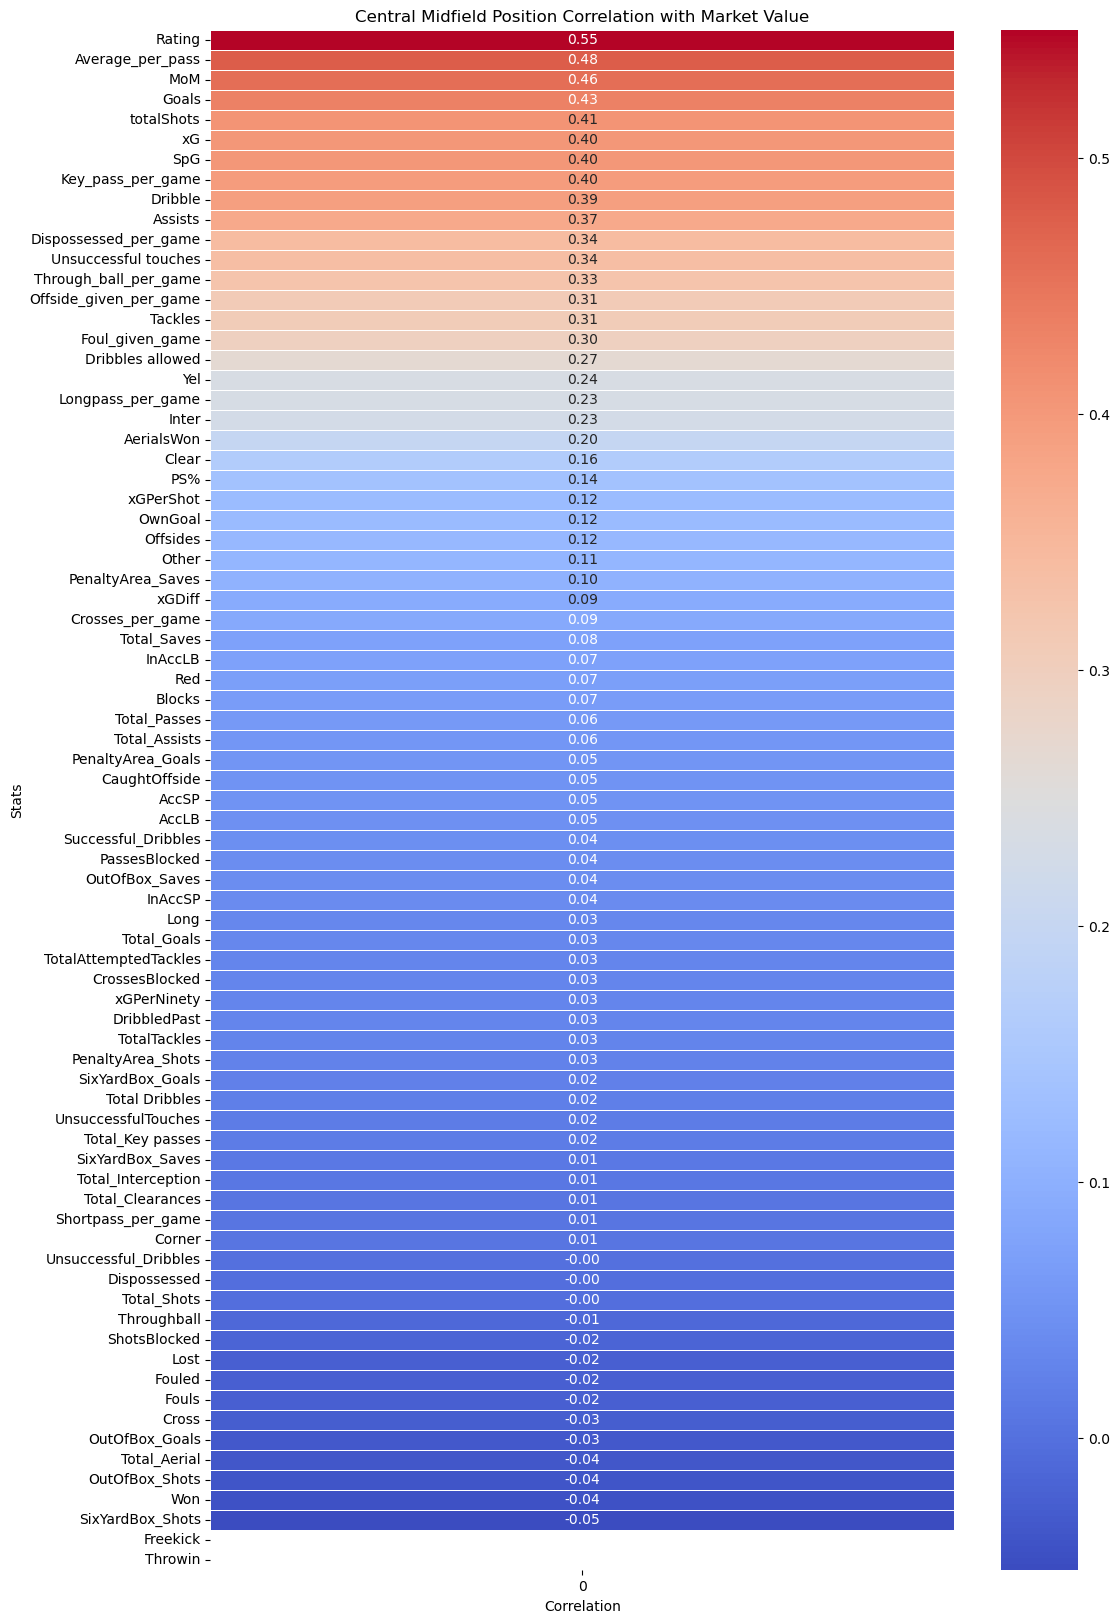

In [9]:
def analyze_correlation(position_data, market_value, position):
    corr_data = position_data.corrwith(market_value).sort_values(ascending=False)
    plt.figure(figsize=(12, 20))
    sns.heatmap(corr_data.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"{position} Position Correlation with Market Value")
    plt.xlabel('Correlation')
    plt.ylabel('Stats')
    plt.show()

cm_data = df[df['position'] == 'Central Midfield']
cm_data_cleaned = cm_data[stats + ['Market Value']].fillna(cm_data[stats + ['Market Value']].mean())
centered_data = cm_data_cleaned[stats] - cm_data_cleaned[stats].mean()

analyze_correlation(centered_data, cm_data_cleaned['Market Value'], 'Central Midfield')

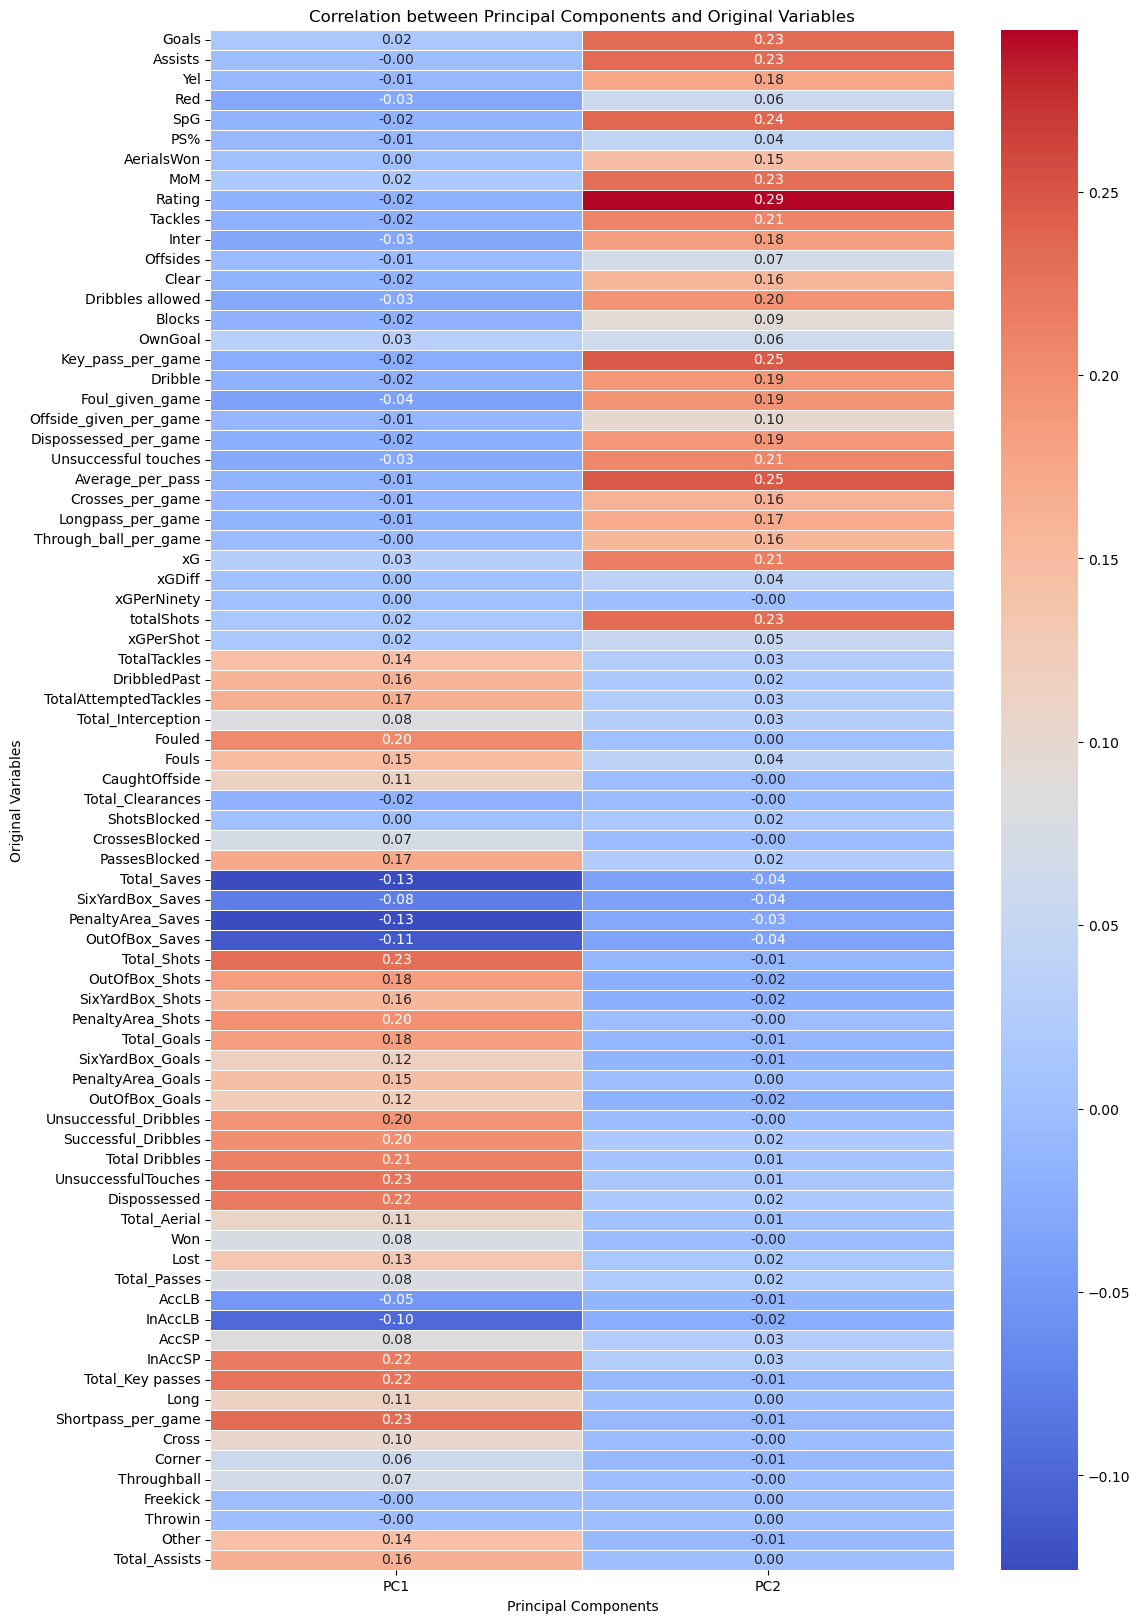

{'Central Midfield': ['OutOfBox_Saves', 'Fouled', 'TotalAttemptedTackles', 'PenaltyArea_Shots', 'Total_Goals', 'Assists', 'Dribble', 'OutOfBox_Goals', 'Through_ball_per_game', 'xG', 'Crosses_per_game', 'PassesBlocked', 'MoM', 'PenaltyArea_Saves', 'Longpass_per_game', 'Average_per_pass', 'Total Dribbles', 'Other', 'Long', 'CaughtOffside', 'Yel', 'Clear', 'Dribbles allowed', 'DribbledPast', 'Lost', 'Total_Key passes', 'Foul_given_game', 'PenaltyArea_Goals', 'Unsuccessful_Dribbles', 'OutOfBox_Shots', 'SpG', 'Key_pass_per_game', 'UnsuccessfulTouches', 'totalShots', 'Total_Shots', 'Fouls', 'Successful_Dribbles', 'Inter', 'Goals', 'SixYardBox_Shots', 'Total_Saves', 'TotalTackles', 'Dispossessed_per_game', 'Total_Aerial', 'AerialsWon', 'Tackles', 'SixYardBox_Goals', 'Offside_given_per_game', 'InAccSP', 'Rating', 'Unsuccessful touches', 'Shortpass_per_game', 'Cross', 'Dispossessed', 'Total_Assists']}


In [10]:
cm_data = df[df['position'] == 'Central Midfield']
cm_data_cleaned = cm_data[stats + ['Market Value']].fillna(cm_data[stats + ['Market Value']].mean())
centered_data = cm_data_cleaned[stats] - cm_data_cleaned[stats].mean()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(centered_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

corr_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=stats)

plt.figure(figsize=(12, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Principal Components and Original Variables")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()

selected_stats = {}
for pc in ['PC1', 'PC2']:
    selected_stats[pc] = corr_matrix[abs(corr_matrix[pc]) > 0.1].index.tolist()

position_stats = {'Central Midfield': list(set(selected_stats['PC1'] + selected_stats['PC2']))}

print(position_stats)

In [11]:
positions = df['position'].unique()

position_stats = {}
for position in positions:
    position_data = df[df['position'] == position]
    position_data_cleaned = position_data[stats + ['Market Value']].fillna(position_data[stats + ['Market Value']].mean())
    centered_data = position_data_cleaned[stats] - position_data_cleaned[stats].mean()
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(centered_data)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    corr_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=stats)
    selected_stats = {}
    for pc in ['PC1', 'PC2']:
        selected_stats[pc] = corr_matrix[abs(corr_matrix[pc]) > 0.1].index.tolist()
    
    position_stats[position] = list(set(selected_stats['PC1'] + selected_stats['PC2']))

with open('./Leagues/position_stats.json', 'w') as f:
    json.dump(position_stats, f)